In [221]:
%matplotlib inline

from numpy import linspace, abs, log10, var
import matplotlib.pyplot as plt
import peakutils
from scipy.fftpack import fftfreq
import pandas
from IPython.display import display, Audio
import time

SAMPLING_RATE = 100000
BW = 200

In [246]:
# Plot FFT frequency domain
HALF = int(SAMPLING_RATE/2)

def plot_output(output, thres=0.95, logscale=False, filter=True):
    plt.figure(figsize=(8, 4), dpi=80)
    freq = linspace(-HALF, HALF, len(output))
    right = output[:1024]
    left = output[1024:]
    output = left.append(right)
    if filter:
        output[:1024-BW] = 0
        output[1024+BW:] = 0

    if logscale:
        output = 20 * log10(output)
        plt.ylabel("Magnitude(dB)")
    else:
        plt.ylabel("Magnitude")

    plt.plot(freq, output)
    
    plt.xlabel("Frequency(Hz)")
    plt.title("Frequency domain")

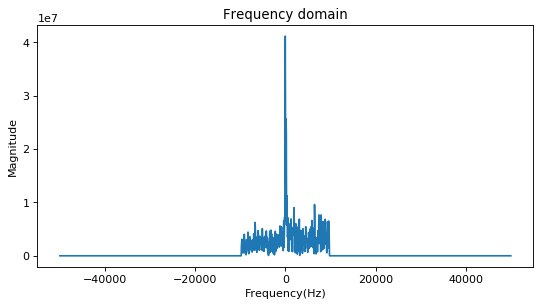

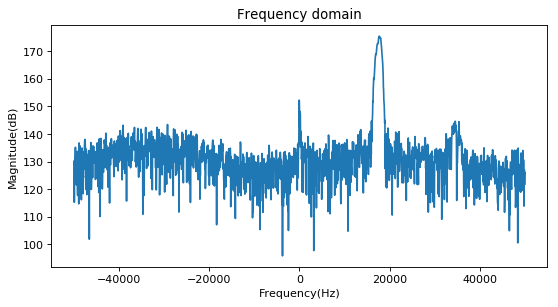

In [263]:
df = pandas.read_csv("./out.fft")
plot_output(df['Magnitude'], logscale=False, thres=0.7)
plot_output(df['Magnitude'], logscale=True, thres=0.7, filter=False)